## The project aims to answer the following key questions:

- Does various predicting factors which has been chosen initially really affect the Life expectancy?

- What are the predicting variables actually affecting the life expectancy?

- Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

- How does Infant and Adult mortality rates affect life expectancy?

- Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking  alcohol etc.

- What is the impact of schooling on the lifespan of humans?

- Does Life Expectancy have positive or negative relationship with drinking alcohol?

- Do densely populated countries tend to have lower life expectancy?

- What is the impact of Immunization coverage on life Expectancy?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno  #For missing values
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### Adult Mortality: People dying between 15 and 60 years
#### Income composition of resources:  The percentage upto which the countries are  using their available resources productively.
#### Alcohol units may be total litres of alcohol consumed 

In [5]:
print(f"There are {df.shape[0]} records and {df.shape[1]} attributes in the given dataset")

There are 2938 records and 22 attributes in the given dataset


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


# Analyzing the null values

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

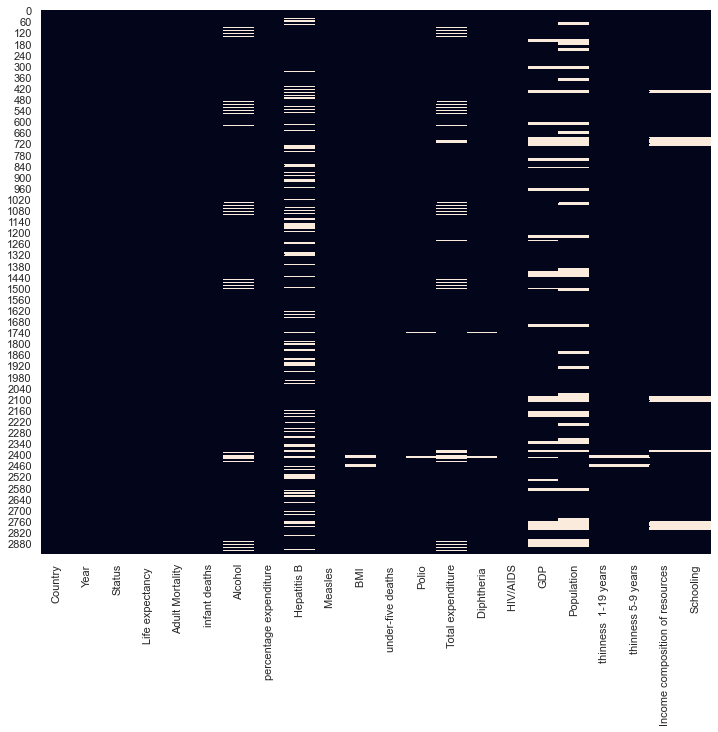

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cbar=False)

### This explains where in the data we are likely to find the missing values, for instance in Alcohol attribute there are some missing values in the records between 60 to 180 and then between 480 to 600 and so on out of the total 2744 records for Alcohol

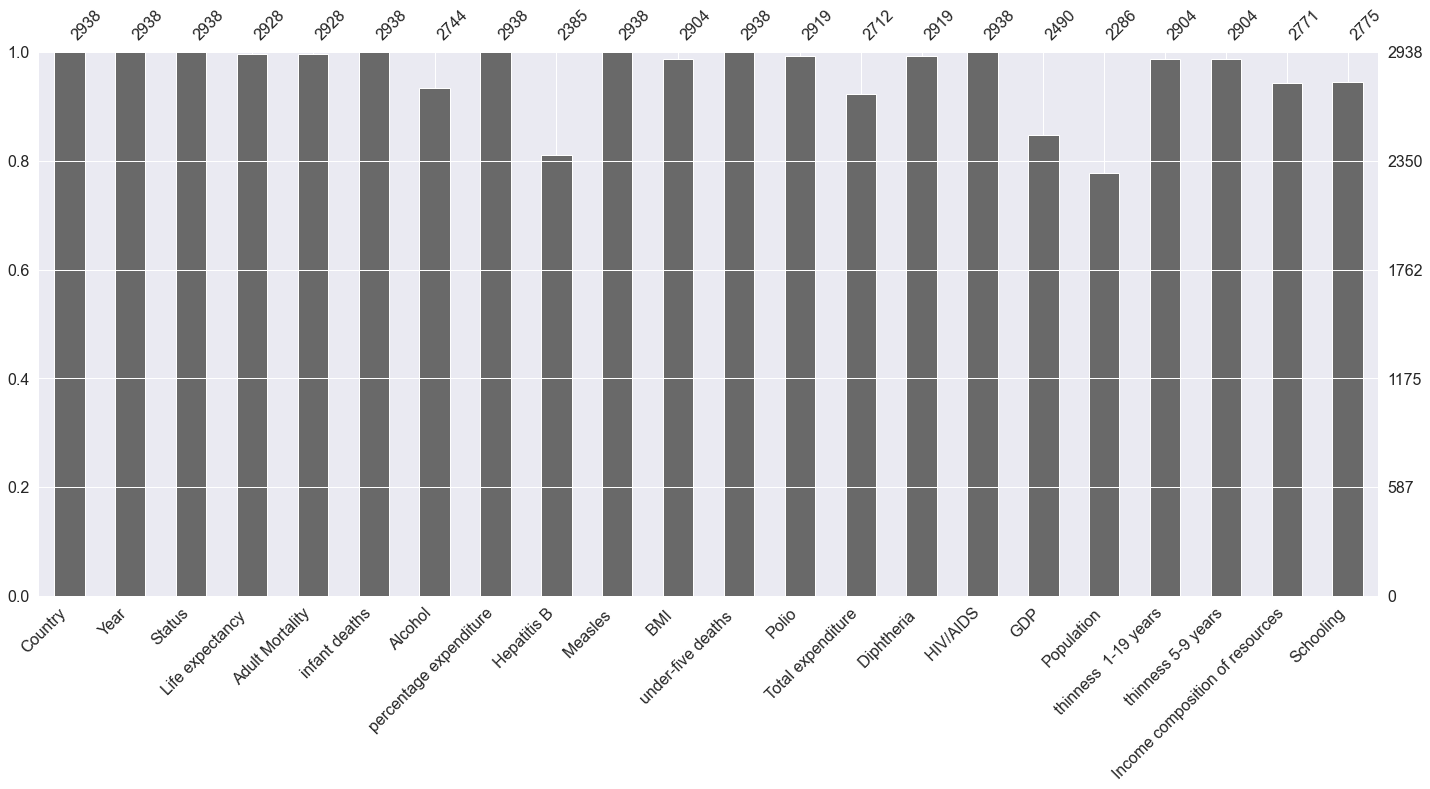

In [9]:
msno.bar(df)

### This bar chart represents the number of records in each column. Here we have two scales, one telling the exact amount of values in the field (right) and the other representing the proportion to the total number of rows. The height of the bar - the total range gives the number/proportion of null values

# Analyzing the dependent variable : Life expectancy

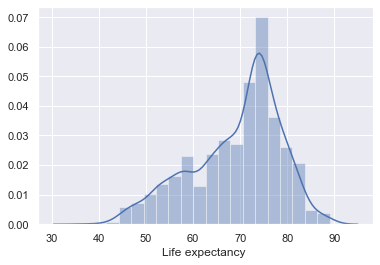

In [10]:
sns.distplot(df["Life expectancy "],bins=20)

In [11]:
#Shapiro Wilsky test 
from scipy.stats import shapiro
data=df["Life expectancy "]
stat,p=shapiro(data)
print('stat=%.3f, p=%.3f \n'%(stat,p))
if(p>0.05):
    print("Probably a Normal Distribution")
else:
    print("Probably not a Normal Distribution")

stat=nan, p=1.000 

Probably a Normal Distribution


### Life Expectancy follows Normal Distribution

# Analyzing the Country attribute

In [12]:
#This data frame holds the mean values of each attribute
data=df.groupby("Country").mean().reset_index()
data.rename(columns = {'Country':'CountryName',"Life expectancy ":"Average Life expectancy"}, inplace = True)
data.head()

,CountryName,Year,Average Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [13]:
data.replace({"Iran (Islamic Republic of)": "Iran", "Bolivia (Plurinational State of)": "Bolivia", "Micronesia (Federated States of)": "Micronesia", "Venezuela (Bolivarian Republic of)": "Venezuela", "Viet Nam": "Vietnam","United Republic of Tanzania":"Tanzania","The former Yugoslav republic of Macedonia":"Macedonia"}, inplace = True)

In [14]:
countries=data[["CountryName",'Average Life expectancy']]
countries.head()

,CountryName,Average Life expectancy
0,Afghanistan,58.19375
1,Albania,75.15625
2,Algeria,73.61875
3,Angola,49.01875
4,Antigua and Barbuda,75.05625


In [15]:
countries.shape

(193, 2)

### 1. Conversion to Alpha 2 codes and Continents
The alpha 2 codes are easier to work with for later analysis, so the short country names are converted to alpha 2 country codes. For example, United States is converted to US.Python’s pycountry-convert package is used to handle the conversion.  It returns this shortened form along with the continent.

In [16]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)
countries["codes"]=countries["CountryName"].apply(get_continent)


In [17]:
countries.head(3)

,CountryName,Average Life expectancy,codes
0,Afghanistan,58.19375,"(AF, AS)"
1,Albania,75.15625,"(AL, EU)"
2,Algeria,73.61875,"(DZ, AF)"


In [18]:
countries["Country"]=countries["codes"].apply(lambda x:x[0])
countries["Continent"]=countries["codes"].apply(lambda x:x[1])
countries.head(3)

,CountryName,Average Life expectancy,codes,Country,Continent
0,Afghanistan,58.19375,"(AF, AS)",AF,AS
1,Albania,75.15625,"(AL, EU)",AL,EU
2,Algeria,73.61875,"(DZ, AF)",DZ,AF


### Check to see if any country has not been properly decoded

In [19]:
countries[countries["Continent"]=="Unknown"]

,CountryName,Average Life expectancy,codes,Country,Continent
137,Republic of Korea,80.48750,"(Unknown, Unknown)",Unknown,Unknown
171,Timor-Leste,64.75625,"(TL, Unknown)",TL,Unknown


In [20]:
countries['codes'][137] =("KP","AS")
countries['Country'][137] ="KP"
countries['Continent'][137] ="AS"


countries['codes'][71] =("TL","AS")
countries['Continent'][171] ="AS"

In [21]:
countries[countries["Continent"]=="Unknown"].sum()  #All good to go

CountryName                0.0
Average Life expectancy    0.0
codes                      0.0
Country                    0.0
Continent                  0.0
dtype: float64

### Handling the missing data for Life expectancy of the countries by taking the mean life expectancy of the continent to which they belong

In [22]:
raw_data=countries[countries['Average Life expectancy'].isna()==True]
raw_data.head()

,CountryName,Average Life expectancy,codes,Country,Continent
38,Cook Islands,NaN,"(CK, OC)",CK,OC
49,Dominica,NaN,"(DM, NA)",DM,NA
105,Marshall Islands,NaN,"(MH, OC)",MH,OC
110,Monaco,NaN,"(MC, EU)",MC,EU
117,Nauru,NaN,"(NR, OC)",NR,OC


In [23]:
avgLife=countries.groupby("Continent").mean()["Average Life expectancy"].reset_index()

In [24]:
def fillMissing(x):
    continent=raw_data[raw_data["CountryName"]==x]["Continent"].values
    lifeCount=avgLife[avgLife["Continent"]==continent[0]].values
    index=df[df["Country"]==x]["Life expectancy "].index.values
    df.loc[index[0], "Life expectancy "] = lifeCount[0][1]

raw_data["CountryName"].apply(fillMissing)

38     None
49     None
105    None
110    None
117    None
124    None
128    None
142    None
146    None
178    None
Name: CountryName, dtype: object

In [25]:
#Note that the Life expectancy in the original dataset has no missing values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Already compiled code for graphing:

In [26]:
mapDrawing=pd.read_csv('CountriesWithLocations.csv')
mapDrawing.head(2)

,CountryName,Average Life expectancy,codes,Country,Continent,GeoLocate,Latitude,Longitude
0,Afghanistan,58.19375,"('AF', 'AS')",AF,AS,"(11.272670699999999, 41.699133346181284)",11.272671,41.699133
1,Albania,75.15625,"('AL', 'EU')",AL,EU,"(47.8522282, 16.4673072)",47.852228,16.467307


In [27]:
countries.to_csv('CountriesWithLocations.csv', header=True, index=False)
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(mapDrawing)):
        lat = mapDrawing.iloc[i]['Latitude']
        long = mapDrawing.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Average Life expectancy : {}<br>"""
        popup_text = popup_text.format(mapDrawing.iloc[i]['CountryName'],
                                   mapDrawing.iloc[i]['Average Life expectancy']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

### Click on the corresponding points and go deeper to observe the average life expectancy of that country

## -----------------------------------------------------------------------------------------------------------------------------

## For explanation look below

### Data Preprocessing of those nations who do not have their GeoLocations 

## -----------------------------------------------------------------------------------------------------------------------------

### Handling the rest of the missing values

In [28]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Handling rest of the missing data of the countries by taking their respective means wrt the continent to which they belong

In [29]:
#Adult Mortality is positively skewed hence median would be a better estimate than mean
df["Adult Mortality"]=df["Adult Mortality"].fillna(value=df["Adult Mortality"].median())

#Alcohol is positively skewed hence median would be a better estimate than mean
df["Alcohol"]=df["Alcohol"].fillna(value=df["Alcohol"].median())

#Hepatitis B is negatively skewed hence median would be a better estimate than mean
df["Hepatitis B"]=df["Hepatitis B"].fillna(value=df["Hepatitis B"].median())

#BMI is bimodal hence median would be a better estimate than mean
df[" BMI "]=df[" BMI "].fillna(value=df[" BMI "].median())


#Polio is negatively skewed hence median would be a better estimate than mean
df["Polio"]=df["Polio"].fillna(value=df["Polio"].median())

#Total expenditure is almost symmetric hence mean would be a better estimate
df["Total expenditure"]=df["Total expenditure"].fillna(value=df["Total expenditure"].mean())

#Diphtheria is negatively skewed hence median would be a better estimate than mean
df["Diphtheria "]=df["Diphtheria "].fillna(value=df["Diphtheria "].median())

#GDP is heavily positively skewed hence median would be a better estimate than mean
df["GDP"]=df["GDP"].fillna(value=df["GDP"].median())

#Population is heavily positively skewed hence median would be a better estimate than mean
df["Population"]=df["Population"].fillna(value=df["Population"].median())

#It is partially bimodal hence median may be a better estimate than mean
df[" thinness  1-19 years"]=df[" thinness  1-19 years"].fillna(value=df[" thinness  1-19 years"].median())

#It is partially bimodal hence median may be a better estimate than mean
df[" thinness 5-9 years"]=df[" thinness 5-9 years"].fillna(value=df[" thinness 5-9 years"].median())

#It is heavily clustered in the middle hence mean may be a better estimate 
df["Income composition of resources"]=df["Income composition of resources"].fillna(value=df["Income composition of resources"].mean())

#Total expenditure is almost symmetric hence mean would be a better estimate
df["Schooling"] = df["Schooling"].fillna(df["Schooling"].mean())

## Performing Data Analysis

### Analyzing the Life expectancy wrt the Status of each country

<Figure size 720x432 with 0 Axes>

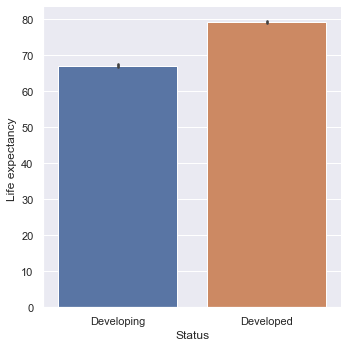

In [30]:
plt.figure(figsize=(10,6))
b_plot=sns.factorplot(x="Status",y="Life expectancy ",data=df,kind="bar")
plt.show()

## Analyzing the Life expectancy wrt the continent to which each country belongs

<Figure size 720x432 with 0 Axes>

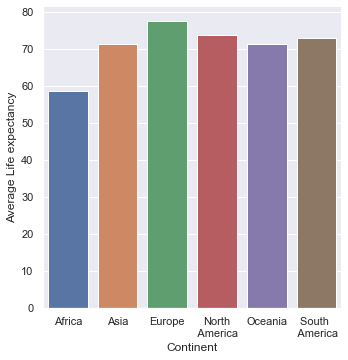

In [31]:

plt.figure(figsize=(10,6))
b_plot=sns.factorplot(x="Continent",y="Average Life expectancy",data=avgLife,kind="bar")
b_plot.set_xticklabels(["Africa","Asia","Europe","North\n America","Oceania","South \n America"])
plt.show()


#### The bar graph suggests that the African countries seem to have a less Life expectancy on an average as compared to the middle Eastern countries

### Analyzing the Life expectancy with respect to the income composition of Resources

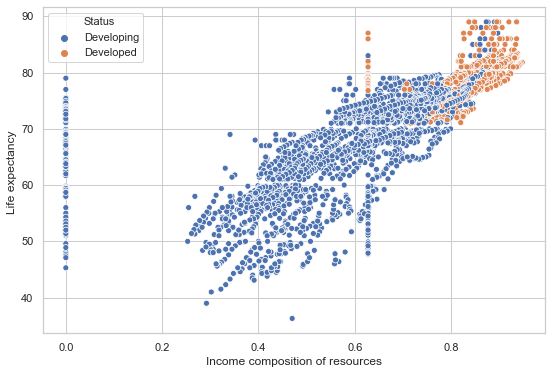

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["Income composition of resources"],y=df["Life expectancy "],hue=df["Status"])

####  Most of the developing countries  have a low ICOR value and correspondingly a lower Life Span which means they are not using their available resources productively

## Q1.) Does various predicting factors which has been chosen initially really affect the Life expectancy?

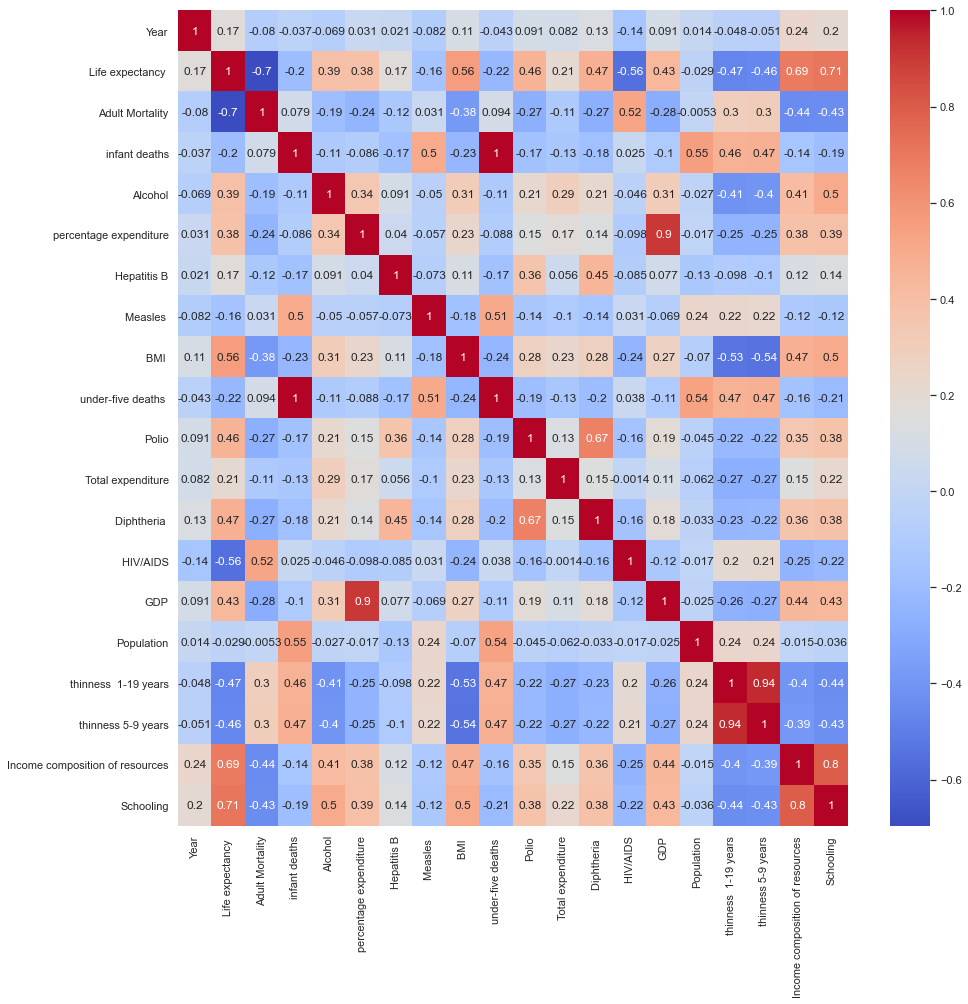

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,cmap="coolwarm")

#### Year,Hepatitis B,Total Expenditure,Population are the factors that do not show a good linear relationship with Life expectancy so their contribution towards Life Expectancy may not be that significant

## Q2.) What are the predicting variables actually affecting the life expectancy?

In [34]:
import statsmodels.api as sm
from scipy import stats

X=df.drop(["Country","Life expectancy "],axis=1)
y=df["Life expectancy "]

# As Status is a Nominal Categorical data we will perform OneHotEncoding
X["Status"] = pd.get_dummies(X["Status"], drop_first= True)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     665.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:16:55   Log-Likelihood:                -8264.4
No. Observations:                2938   AIC:                         1.657e+04
Df Residuals:                    2917   BIC:                         1.670e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

#### The p values of the predictors suggests which one of them are actually useful in prediction

## Q3.) Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

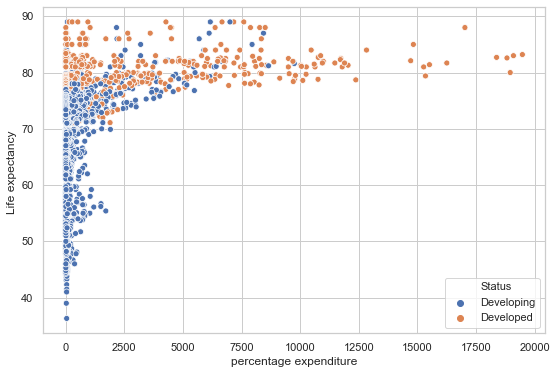

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["percentage expenditure"],y=df["Life expectancy "],hue=df["Status"])

#### The scatter plot  suggests that if the percentange of the expenditure towards healthcare for countries having lifespan<65 is increased the average Life Span could be increased

## Q4.) How does Infant and Adult mortality rates affect life expectancy?

In [36]:
df.corr()["Life expectancy "]["Adult Mortality"]

-0.6962887132343794

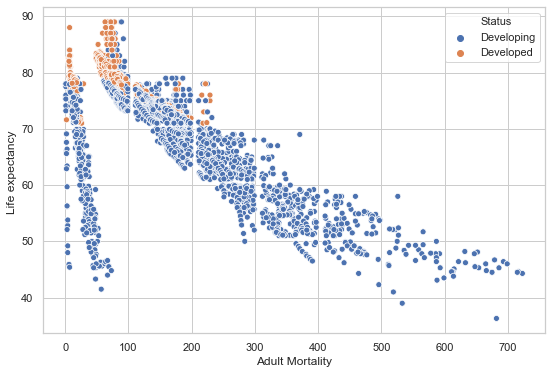

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["Adult Mortality"],y=df["Life expectancy "],hue=df["Status"])

####  A clear negative correlation can be observed between Adult Mortality and Life Expectancy. The plot also suggests that Developed countries seem to have a less Adult Mortality rate and consequently a larger Life span than the Developing Countries.

In [38]:
df.corr()["Life expectancy "]["infant deaths"]

-0.19680579958089892

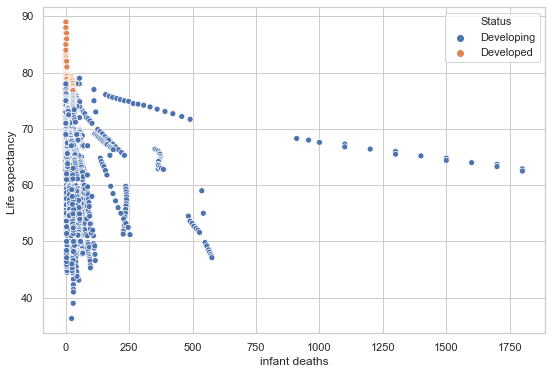

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["infant deaths"],y=df["Life expectancy "],hue=df["Status"])

####  The average life Span is not affected for infant deaths ranging between 0-120, however as these infant deaths increase there is a monotone decrease in the Life span of the people. Another thing to note that the infant deaths have been recorded only in Developing Countries and not in Developed Countries. Another reason as to why schooling is an important factor for increasing the average Life span in terms of educating the people

## Q5.) Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

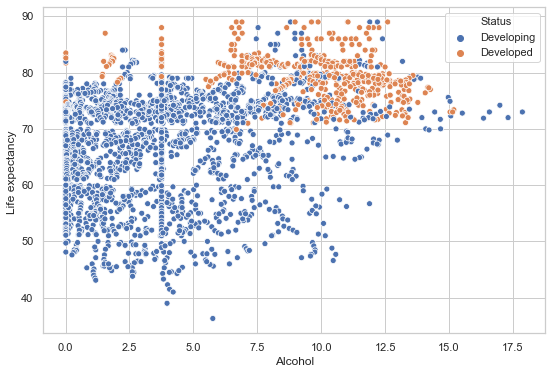

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["Alcohol"],y=df["Life expectancy "],hue=df["Status"])

####  Surprisingly, the developed countries are majorly the ones who have had a greater Life span as compared to those countries who have  consumed the same amount of Alcohol. Perhaps this is because of the good expenditure they hold towards their healtchare.

In [41]:
df.corr()["Life expectancy "][" BMI "]

0.5564212384010777

####  There is a good amout of postive correlation with Life expectancy and BMI, but it is not a good idea to check for the linear realtionship between BMI and Life Expectancy

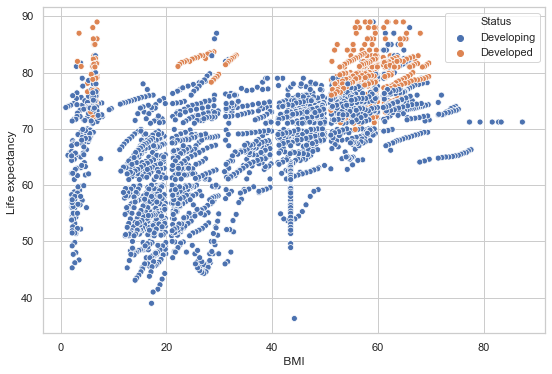

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df[" BMI "],y=df["Life expectancy "],hue=df["Status"])

#### BMI between 18.5 to 24.9,is considered normal or Healthy Weight 
#### BMI between 25.0 to 29.9, is considered within the overweight range. 
#### BMI between  30.0 or higher, is considered within the obese range.

#### There are certain Developing nations which have succembed to a less life span due to Obesity , but again the Developed Countries did not suffer from this issue, perhaps again due to their healthcare faciitlier


## Q6.) What is the impact of schooling on the lifespan of humans?

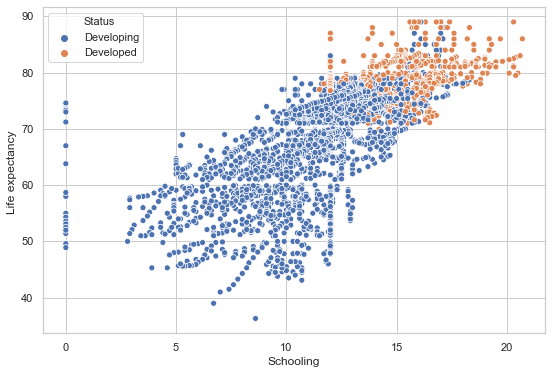

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["Schooling"],y=df["Life expectancy "],hue=df["Status"])

#### The plot suggests that the the number of years people spend learning in school leads to an increase their life expectancy.Moreover it also shows that the developed countries have seen more years of studying which is a bit of concern. The correlation coefficient of schooling with life expectancy is 0.71.

## Q7.) Does Life Expectancy have positive or negative relationship with drinking alcohol?

In [44]:
df.corr()["Life expectancy "]["Alcohol"]

0.3885717871402027

####  There is a postive correlation but a weak one with Life expectancy and Alcohol

## Q8.) Do densely populated countries tend to have lower life expectancy?

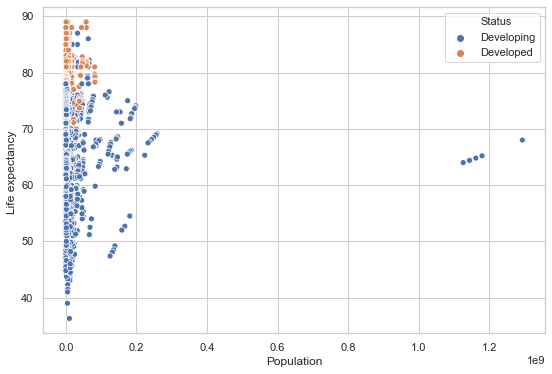

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["Population"],y=df["Life expectancy "],hue=df["Status"])

#### A decrease in the life expectancy is observed when the population gets more denser
#### There are certain leverage points which can be seen for the Population


## Q9.) What is the impact of Immunization coverage on life Expectancy?

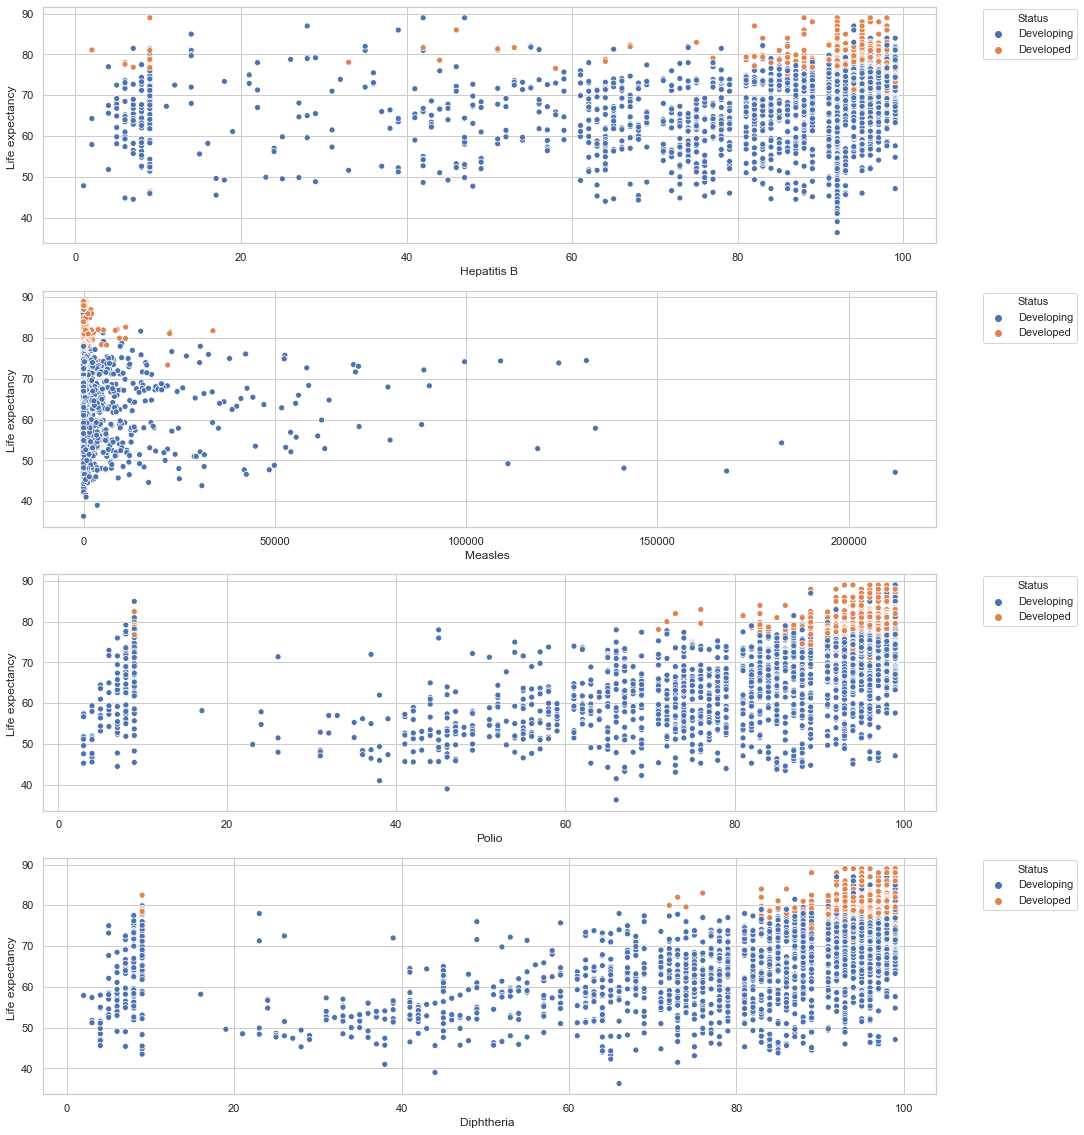

In [46]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(16,20))

HepatitisB_Plot=sns.scatterplot(ax=axes[0],x=df["Hepatitis B"],y=df["Life expectancy "],hue=df["Status"])
HepatitisB_Plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
Measles_Plot=sns.scatterplot(ax=axes[1],x=df['Measles '],y=df["Life expectancy "],hue=df["Status"])
Measles_Plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
Polio_Plot=sns.scatterplot(ax=axes[2],x=df["Polio"],y=df["Life expectancy "],hue=df["Status"])
Polio_Plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
Diphtheria_Plot=sns.scatterplot(ax=axes[3],x=df['Diphtheria '],y=df["Life expectancy "],hue=df["Status"])
Diphtheria_Plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)

#### For Hepatitis B, Polio and Diphtheria the coverage has been greater except for some Developing Countries like Afghanistan, Malaysia, India,etc and For Measles the coverage is more around 25000 children